# Linear Regression : Assignment

## Objective

 Model the price of cars with the available independent variables.

## Data Description 

Below Image shows the description of the variables present in the data
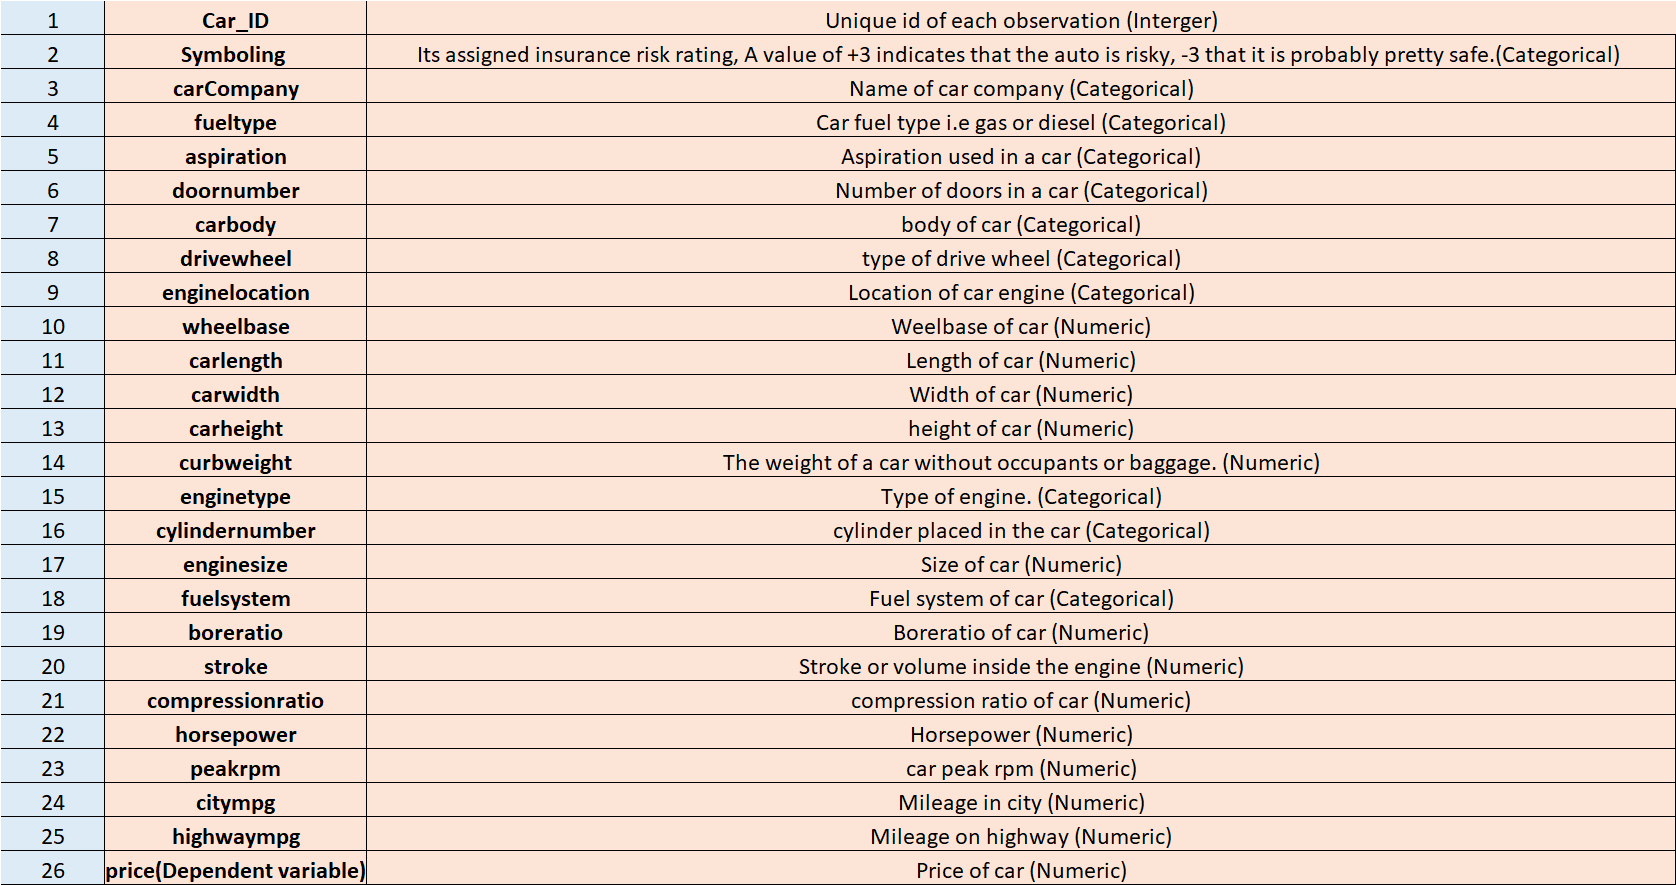

### Importing Python Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Preprocessing

### Importing Data

In [123]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [124]:
data.shape

(205, 26)

There are 205 records and 26 columns in the dataframe.

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Dealing with missing values

In [126]:
#Lets first calculate the proportion of missing values across columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing}).sort_values('percent_missing',ascending=False)
#Only display columns having missing values
display(missing_value_df[missing_value_df.percent_missing>0])

,column_name,percent_missing


Fortunately, there are no missing values present in this dataset.

Getting the basic stats of the data

In [127]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [128]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

As we know that the column CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model', thus we can deal with this first by creating two additional columns for this field.

In [129]:
data['CarCompany'] = data['CarName'].str.split(' ').str[0]
data['CarModel'] = data['CarName'].str.split(' ').str[1]
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


 For further analysis, we will remove the CarName Variable as it has already been used to form two additional columns.

In [130]:
data = data.drop(['CarName'],axis=1)

Lets convert the columns to appropriate data types for the analysis.

In [131]:
#Function for converting a list of columns to categorical for a df
def convert_to_categorical(df,columnlist):
    for i in columnlist:
        df[i]=df[i].astype('category')
categories_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem','CarCompany','CarModel']

convert_to_categorical(data,categories_columns)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null in

Converting the the car company name to appropriate case.

In [133]:
data['CarCompany'] = data['CarCompany'].str.title()
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi,100
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi,100ls


#### Car Company Name

We can now have a look at how this Car company name affects the price of the car.

In [134]:
fig = px.box(data, x='CarCompany',y='price')
fig.update_layout(template='plotly_white')
fig.show()

There seems to be a data preprocessing issue with the CarCompany variable as there are instances where similar brand is mistyped and thus getting treated as a different one. We need to resolve this before doing any analysis.

In [135]:
Car_company_mapping = pd.DataFrame({'CarCompany':['Alfa-Romero','Audi','Bmw','Chevrolet','Dodge','Honda','Isuzu','Jaguar',
                                             'Maxda','Mazda','Buick','Mercury','Mitsubishi','Nissan','Peugeot',
                                             'Plymouth','Porsche','Porcshce','Renault','Saab','Subaru','Toyota',
                                             'Toyouta','Volkswagen','Vw','Volvo'],
                                   'CarCompanyName':['Alfa-Romero','Audi','Bmw','Chevrolet','Dodge','Honda','Isuzu','Jaguar',
                                             'Mazda','Mazda','Buick','Mercury','Mitsubishi','Nissan','Peugeot',
                                             'Plymouth','Porsche','Porsche','Renault','Saab','Subaru','Toyota',
                                             'Toyota','Volkswagen','Volkswagen','Volvo']})
Car_company_mapping.tail()

,CarCompany,CarCompanyName
21,Toyota,Toyota
22,Toyouta,Toyota
23,Volkswagen,Volkswagen
24,Vw,Volkswagen
25,Volvo,Volvo


In [136]:
data = pd.merge(data,Car_company_mapping,how='inner',on='CarCompany')
data = data.drop(['CarCompany','car_ID'],axis=1)
data['CarCompanyName'] = data['CarCompanyName'].astype('category')
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel,CarCompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia,Alfa-Romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio,Alfa-Romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio,Alfa-Romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,100,Audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls,Audi


Lets have a look on the effect of car company name on prices now.

In [137]:
fig = px.box(data, x='CarCompanyName',y='price')
fig.update_layout(template='plotly_white')
fig.show()

There seems to be an effect of Car Company on price as there are some companies like bmw, Buick and Porsche which are only offering high priced cars as compared to other car companies.

### Derived Metric : CarCompanyCategory

In [138]:
#We will segment the Car Companies based on avg prices of each Company.
tmp_df = data.groupby(['CarCompanyName'],as_index=False)[['price']].agg('mean')
tmp_df.columns = ['CarCompanyName', 'Avg_price']
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Luxury']
tmp_df['CarCompanyCategory'] = pd.cut(tmp_df['Avg_price'],bins,right=False,labels=cars_bin)
data = pd.merge(data,tmp_df,how='inner',on="CarCompanyName")

In [139]:
display(data.head())

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel,CarCompanyName,Avg_price,CarCompanyCategory
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,giulia,Alfa-Romero,15498.333333,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,stelvio,Alfa-Romero,15498.333333,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,Quadrifoglio,Alfa-Romero,15498.333333,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,100,Audi,17859.166714,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,100ls,Audi,17859.166714,Medium


In [140]:
fig = px.box(data, x='CarCompanyCategory',y='price')
fig.update_layout(template='plotly_white')
fig.show()

Now as we have clustered the car companies into three different segments based on their average prices. We can now use this variable instead of the car company name in the model

#### Car Price

In [141]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(y=data["price"],name='Boxplot',marker_color='royalblue',boxmean='sd'),row=1, col=1
    
)

fig.add_trace(
    go.Histogram(x=data["price"],nbinsx=8,name='Histogram',marker=dict(color='blue'),histnorm='percent'),row=1, col=2
    
)

fig['layout']['yaxis1'].update(title='Car Price')
fig['layout']['xaxis2'].update(title='Car Price')
fig['layout']['yaxis2'].update(title='Proportion')
fig.update_layout(template='plotly_white')
fig.show()



- Above histogram plot seems to be right-skewed, meaning that the most prices in the dataset are low.
- 75% of the cars have price below 16.5k where as the rest of 25% is between 16.5k to 45.4k.
- There is a significant difference between the mean and median car prices.

#### Fuel Type

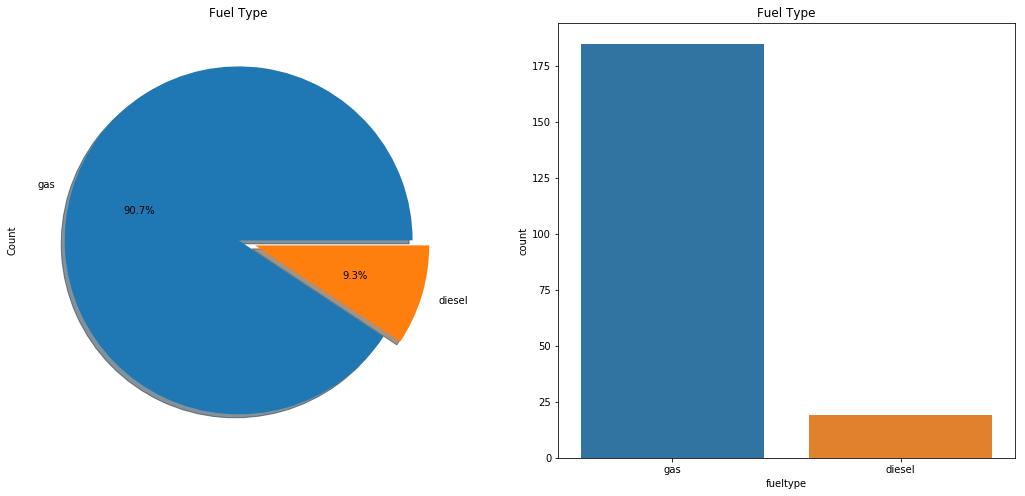

In [142]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['fueltype'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fueltype',data=data,ax=ax[1],order=data['fueltype'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

- 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars.

In [143]:
fig = px.box(data, x='fueltype',y='price')
fig.update_layout(template='plotly_white')
fig.show()

Despite being a small number of data points for diesel, the car price range is higher as compared to gas.

#### Drive Wheel

In [144]:
fig = px.box(data, x='drivewheel',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- Rear wheel drive cars are more expensive with a median price of 16.9k.

#### Body of Car

In [145]:
fig = px.box(data, x='carbody',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- Hatchback, sedan and wagon are prices lower as compared to hardtop and convertible. Though the distribution of hardtop is overlapping with others but it has the highest median price of 19.6k.

#### Number of doors

In [146]:
fig = px.box(data, x='doornumber',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- We can't see a significant effect of number of doors on car price.

#### Engine Type

In [147]:
fig = px.box(data, x='enginetype',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- There seems to be a effect of engine type on car prices as the ohcv engine type is high price range where as the ohc and ohcf have low price range.

#### Number of Cylinders

In [148]:
fig = px.box(data, x='cylindernumber',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- Eight Cylinders have the highest price range.

#### Fuelsystem

In [149]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [150]:
fig = px.box(data, x='fuelsystem',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- mpfi and idi have the highest car price range.
- Counts for other categories are less and thus we cant make any inference.

#### Engine Location

In [151]:
data['enginelocation'].value_counts()

front    201
rear       3
Name: enginelocation, dtype: int64

In [152]:
fig = px.box(data, x='enginelocation',y='price')
fig.update_layout(template='plotly_white')
fig.show()

Not enough data points in rear engine location for comparison.

#### Aspiration

In [153]:
fig = px.box(data, x='aspiration',y='price')
fig.update_layout(template='plotly_white')
fig.show()

- From the above plot, it seems that aspiration with turbo have higher price range than the std.

Lets us now visualize if there is any linear relationship between the variables in the dataset.

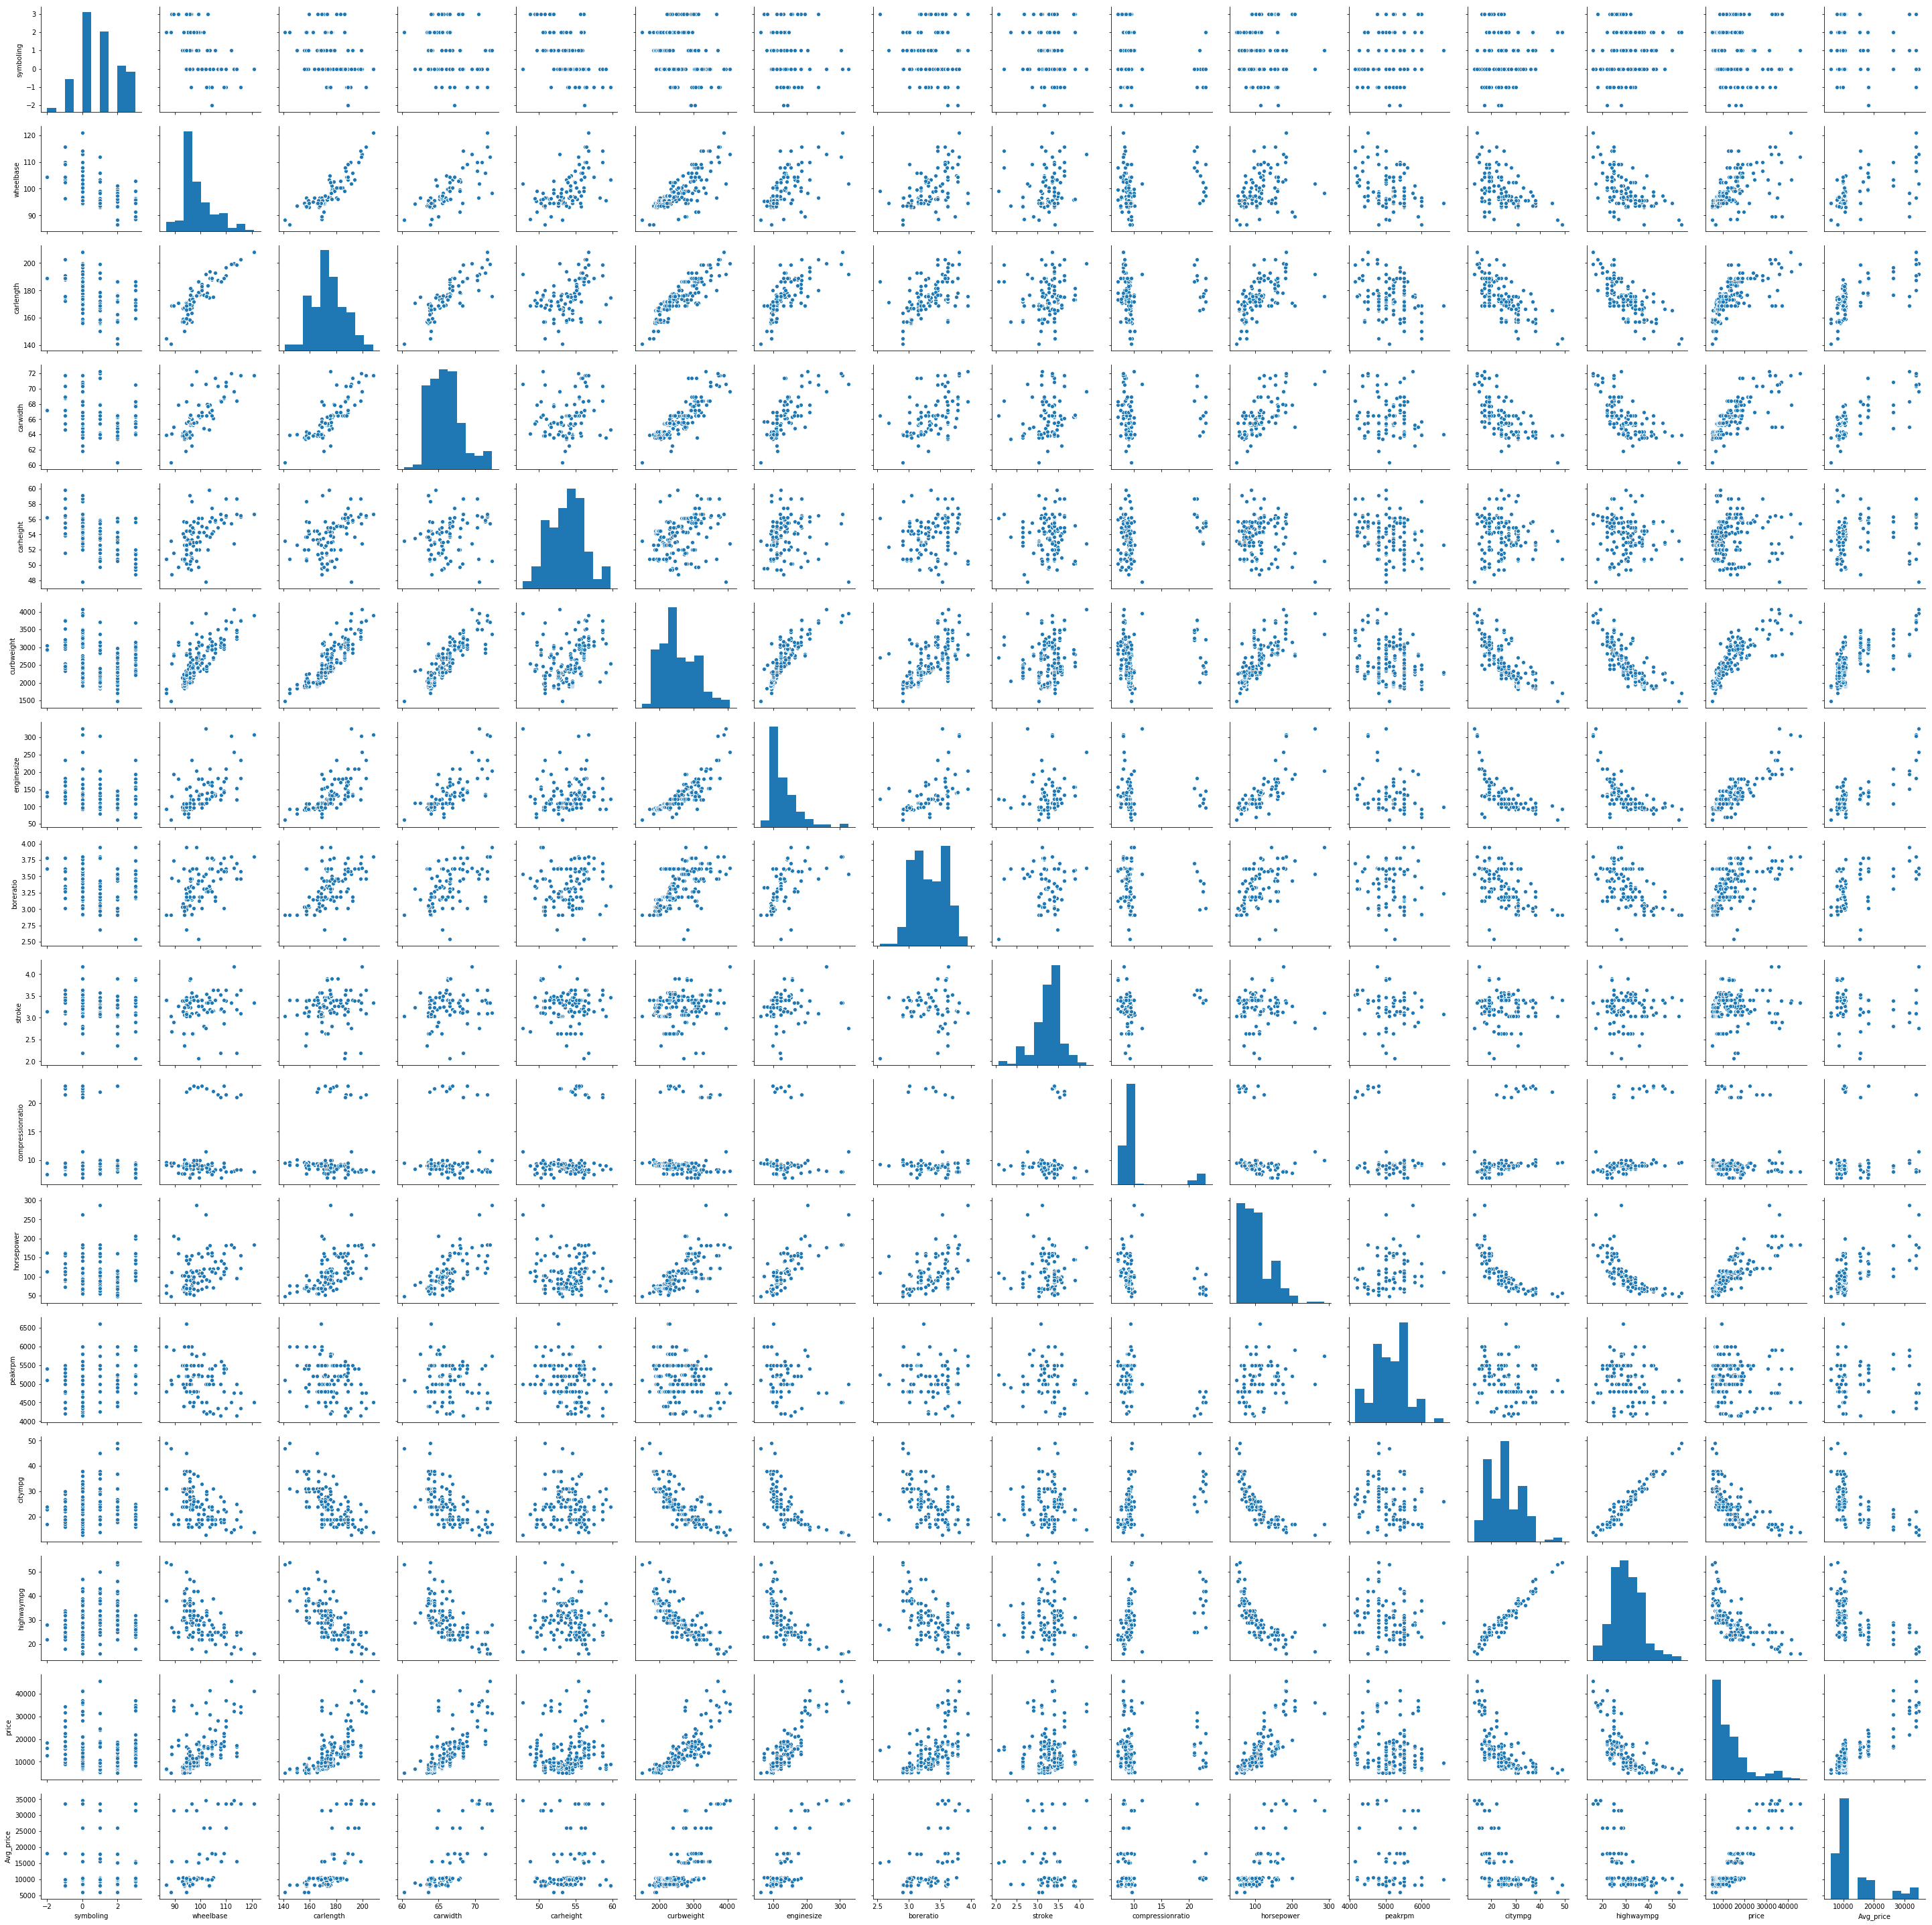

In [154]:
sns.pairplot(data)

There seems a linear relationship across many of the variables which suggest that we can build a linear regression model for predicting the car prices using these variables. <br>
As we cant see in detail which variables have a linear relationship due to the size of the plot. Lets break the plot for better visualization of the relationship.

#### Boreratio, Stroke, Compression Ration, Horsepower vs Price

In [155]:
col_list1= ['boreratio', 'stroke','compressionratio','horsepower','price']
fig = px.scatter_matrix(data,
    dimensions=col_list1)
fig.update_traces(diagonal_visible=False)
fig.show()

- boreratio and horsepower seems to have a positive linear relationship with price.

#### Car Length, Car Width, Car Height, Curb Weight vs Price

In [156]:
col_list2= ['carlength','carwidth','carheight','curbweight','price']
fig = px.scatter_matrix(data,
    dimensions=col_list2)
fig.update_traces(diagonal_visible=False)
fig.show()

- Car Length, Car Width and Curb Weight seems to have a positive correlation with the price whereas the Car Height doesn't indicate a linear relationship with price.

#### Peak RPM, Citympg , highwaympg vs price

In [157]:
col_list3= ['peakrpm','citympg','highwaympg','price']
fig = px.scatter_matrix(data,
    dimensions=col_list3)
fig.update_traces(diagonal_visible=False)
fig.show()

- citympg, highwaympg - seem to have a significant negative correlation with price.

#### Correlation Plot

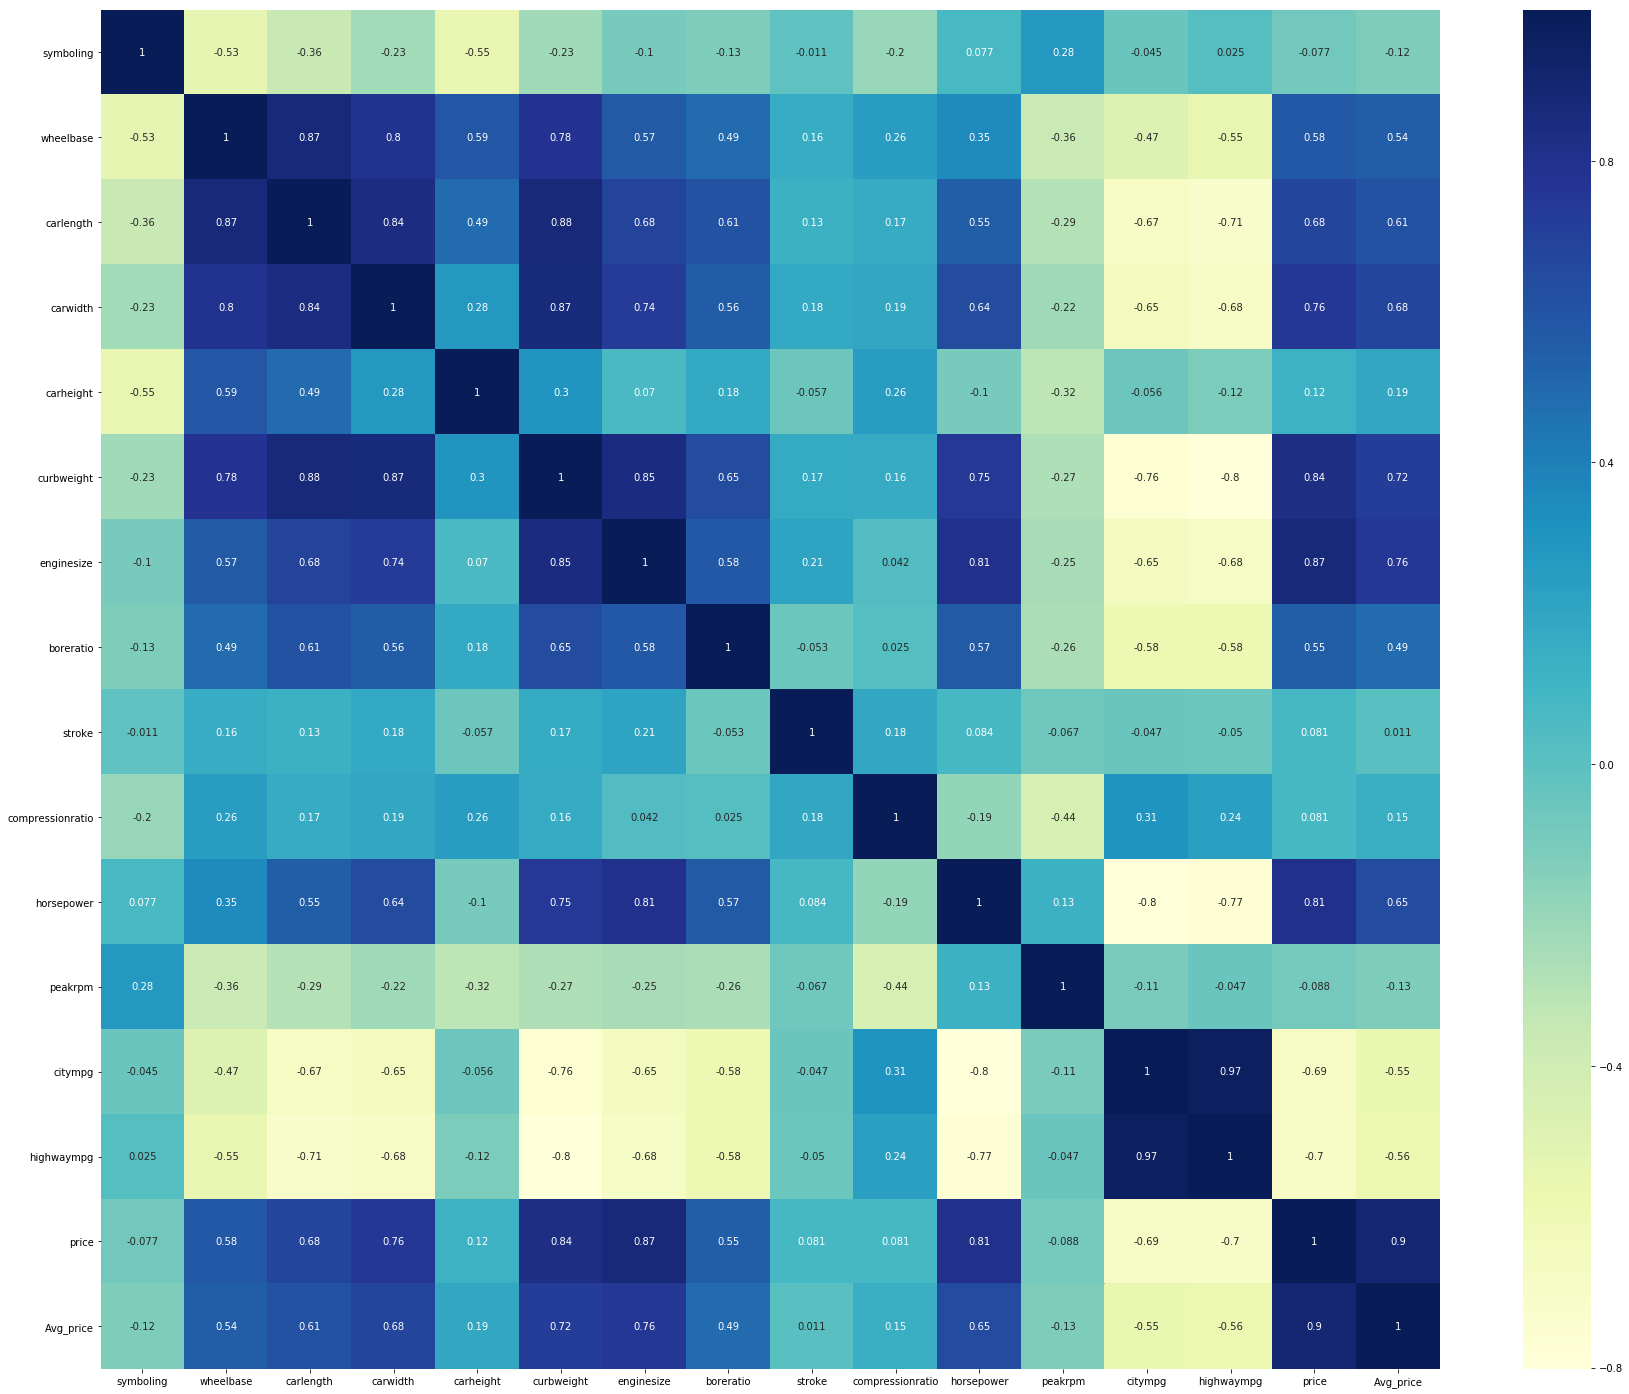

In [158]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Highly correlated variables with price : enginesize, curbweight, horsepower, carwidth, highwaympg, citympg, carlength.

Now as we have seen that many of the variables have a linear relationship with the car price. We can move on to model building now.

#### Significant Variables using EDA

- enginesize
- curbweight
- horsepower
- carwidth
- carlength
- highwaympg
- citympg
- boreratio
- wheelbase
- enginetype
- carbody
- aspiration
- drivewheel
- fueltype
- cylindernumber
- CarCompanyCategory


### Model building

#### Data Preparation

##### Filter out the significant variables from the EDA for the further modelling process.

In [159]:
sig_var_list = ['enginesize','curbweight','horsepower','carwidth','carlength','highwaympg','citympg','boreratio',
                'wheelbase','carbody','aspiration','drivewheel','fueltype','enginetype','cylindernumber',
                'CarCompanyCategory','price']
model_data = data[sig_var_list]

In [160]:
model_data.columns

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'highwaympg', 'citympg', 'boreratio', 'wheelbase', 'carbody',
       'aspiration', 'drivewheel', 'fueltype', 'enginetype', 'cylindernumber',
       'CarCompanyCategory', 'price'],
      dtype='object')

##### Creating Dummy variables for categorical features

In [161]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 17 columns):
enginesize            204 non-null int64
curbweight            204 non-null int64
horsepower            204 non-null int64
carwidth              204 non-null float64
carlength             204 non-null float64
highwaympg            204 non-null int64
citympg               204 non-null int64
boreratio             204 non-null float64
wheelbase             204 non-null float64
carbody               204 non-null category
aspiration            204 non-null category
drivewheel            204 non-null category
fueltype              204 non-null category
enginetype            204 non-null category
cylindernumber        204 non-null category
CarCompanyCategory    204 non-null category
price                 204 non-null float64
dtypes: category(7), float64(5), int64(5)
memory usage: 30.2 KB


In [162]:
categorical_columns_list = model_data.select_dtypes('category').columns
model_data[categorical_columns_list].head()

,carbody,aspiration,drivewheel,fueltype,enginetype,cylindernumber,CarCompanyCategory
0,convertible,std,rwd,gas,dohc,four,Medium
1,convertible,std,rwd,gas,dohc,four,Medium
2,hatchback,std,rwd,gas,ohcv,six,Medium
3,sedan,std,fwd,gas,ohc,four,Medium
4,sedan,std,4wd,gas,ohc,five,Medium


In [163]:
# Function to create and append dummy variables
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

model_data_v1 = model_data

for i in categorical_columns_list:
    model_data_v1 = dummies(i,model_data_v1)

In [164]:
display(model_data_v1.head())

,enginesize,curbweight,horsepower,carwidth,carlength,highwaympg,citympg,boreratio,wheelbase,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
0,130,2548,111,64.1,168.8,27,21,3.47,88.6,13495.0,...,0,0,0,1,0,0,0,0,1,0
1,130,2548,111,64.1,168.8,27,21,3.47,88.6,16500.0,...,0,0,0,1,0,0,0,0,1,0
2,152,2823,154,65.5,171.2,26,19,2.68,94.5,16500.0,...,1,0,0,0,1,0,0,0,1,0
3,109,2337,102,66.2,176.6,30,24,3.19,99.8,13950.0,...,0,0,0,1,0,0,0,0,1,0
4,136,2824,115,66.4,176.6,22,18,3.19,99.4,17450.0,...,0,0,1,0,0,0,0,0,1,0


### Dividing the dataset into train and test

In [165]:
df_train, df_test = train_test_split(model_data_v1,train_size=0.7,random_state=7)
print(df_train.shape,df_test.shape)

(142, 32) (62, 32)


In [166]:
df_train.dtypes

enginesize      int64
curbweight      int64
horsepower      int64
carwidth      float64
carlength     float64
highwaympg      int64
citympg         int64
boreratio     float64
wheelbase     float64
price         float64
hardtop         uint8
hatchback       uint8
sedan           uint8
wagon           uint8
turbo           uint8
fwd             uint8
rwd             uint8
gas             uint8
dohcv           uint8
l               uint8
ohc             uint8
ohcf            uint8
ohcv            uint8
rotor           uint8
five            uint8
four            uint8
six             uint8
three           uint8
twelve          uint8
two             uint8
Medium          uint8
Luxury          uint8
dtype: object

In [167]:
numerics = ['int64','float64']
num_vars = df_train.select_dtypes(include=numerics).columns
num_vars

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'highwaympg', 'citympg', 'boreratio', 'wheelbase', 'price'],
      dtype='object')

In [168]:
df_train[num_vars].head()

,enginesize,curbweight,horsepower,carwidth,carlength,highwaympg,citympg,boreratio,wheelbase,price
115,120,3075,97,68.4,186.7,24,19,3.46,107.9,16630.0
138,97,2050,69,63.4,156.9,36,31,3.62,93.7,5118.0
36,92,2024,76,63.9,157.1,34,30,2.92,96.5,7295.0
84,156,2926,145,66.3,173.2,24,19,3.59,95.9,14489.0
180,171,3131,156,66.5,187.8,24,20,3.27,104.5,15690.0


Scaling Numeric Values 

In [169]:
scalar = MinMaxScaler()

scalar.fit(df_train[num_vars])
df_train[num_vars] = scalar.transform(df_train[num_vars])
df_train.head()

,enginesize,curbweight,horsepower,carwidth,carlength,highwaympg,citympg,boreratio,wheelbase,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
115,0.195312,0.578836,0.190678,0.628571,0.662992,0.210526,0.166667,0.657143,0.620991,0.318037,...,0,0,0,1,0,0,0,0,1,0
138,0.105469,0.143221,0.072034,0.152381,0.193701,0.526316,0.500000,0.771429,0.206997,0.000000,...,0,0,0,1,0,0,0,0,0,0
36,0.085938,0.132172,0.101695,0.200000,0.196850,0.473684,0.472222,0.271429,0.288630,0.060143,...,0,0,0,1,0,0,0,0,0,0
84,0.335938,0.515512,0.394068,0.428571,0.450394,0.210526,0.166667,0.750000,0.271137,0.258889,...,0,0,0,1,0,0,0,0,0,0
180,0.394531,0.602635,0.440678,0.447619,0.680315,0.210526,0.194444,0.521429,0.521866,0.292068,...,0,0,0,0,1,0,0,0,0,0


In [170]:
df_train.describe()

,enginesize,curbweight,horsepower,carwidth,carlength,highwaympg,citympg,boreratio,wheelbase,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.000000,142.000000
mean,0.235035,0.382245,0.235438,0.419249,0.486392,0.371201,0.325900,0.576761,0.372377,0.240881,...,0.056338,0.014085,0.070423,0.767606,0.112676,0.0,0.007042,0.014085,0.436620,0.126761
std,0.167512,0.231992,0.169960,0.211682,0.199187,0.182690,0.181501,0.192812,0.182982,0.227747,...,0.231390,0.118257,0.256763,0.423854,0.317316,0.0,0.083918,0.118257,0.497722,0.333882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.109375,0.205057,0.103814,0.228571,0.360630,0.236842,0.166667,0.435714,0.230321,0.077147,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.199219,0.338079,0.205508,0.361905,0.478740,0.368421,0.305556,0.571429,0.310496,0.169310,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.296875,0.563961,0.287076,0.514286,0.661417,0.473684,0.416667,0.762500,0.475219,0.319384,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


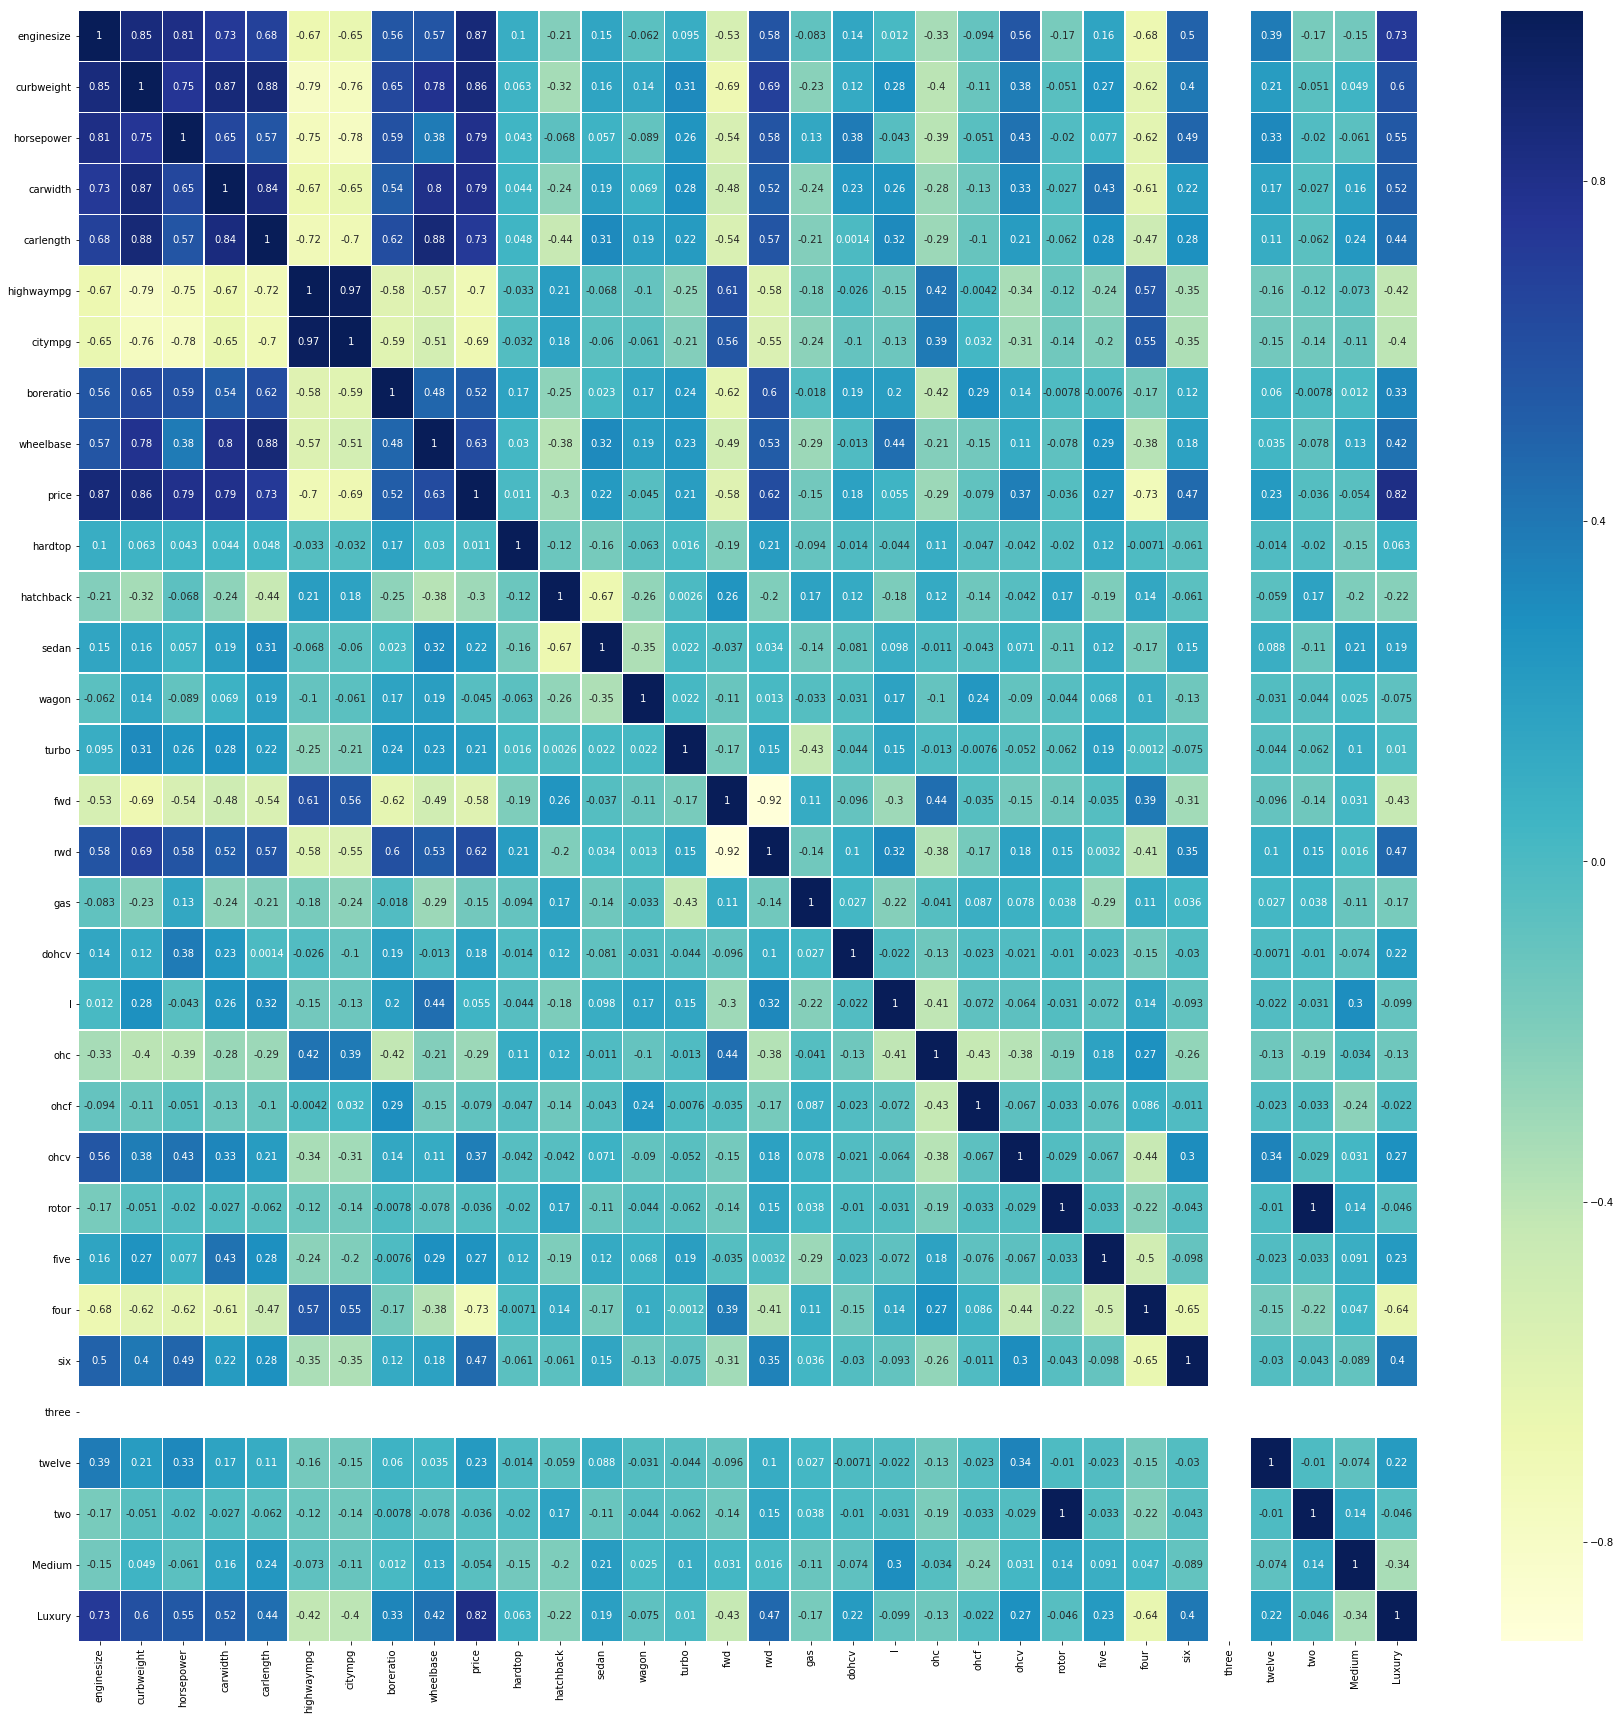

In [171]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu', linewidths=.5)
plt.show()

In [172]:
y_train = df_train.pop('price')
X_train = df_train
y_train.head()

115    0.318037
138    0.000000
36     0.060143
84     0.258889
180    0.292068
Name: price, dtype: float64

#### Applying RFE in order to identify the important variables

In [173]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [174]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('enginesize', False, 20),
 ('curbweight', True, 1),
 ('horsepower', True, 1),
 ('carwidth', True, 1),
 ('carlength', False, 18),
 ('highwaympg', False, 3),
 ('citympg', False, 14),
 ('boreratio', False, 8),
 ('wheelbase', False, 17),
 ('hardtop', False, 4),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 6),
 ('turbo', False, 19),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('gas', False, 21),
 ('dohcv', True, 1),
 ('l', False, 12),
 ('ohc', False, 11),
 ('ohcf', False, 10),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 22),
 ('twelve', True, 1),
 ('two', False, 9),
 ('Medium', False, 13),
 ('Luxury', True, 1)]

##### Significant variables using RFE

In [175]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carwidth', 'dohcv', 'rotor', 'five',
       'four', 'six', 'twelve', 'Luxury'],
      dtype='object')

Building model using the variables from the RFE.

In [176]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,carwidth,dohcv,rotor,five,four,six,twelve,Luxury
115,0.578836,0.190678,0.628571,0,0,0,1,0,0,0
138,0.143221,0.072034,0.152381,0,0,0,1,0,0,0
36,0.132172,0.101695,0.200000,0,0,0,1,0,0,0
84,0.515512,0.394068,0.428571,0,0,0,1,0,0,0
180,0.602635,0.440678,0.447619,0,0,0,0,1,0,0


In [177]:
#Function for building model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#Function for calculating VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

- Model 1

In [178]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           6.35e-71
Time:                        23:33:29   Log-Likelihood:                 198.86
No. Observations:                 142   AIC:                            -375.7
Df Residuals:                     131   BIC:                            -343.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0234      0.053      0.442      0.6

P-value for rotor seems to be more than the significance level of 0.05. Thus removing it.

In [179]:
X_train_new = X_train_rfe.drop(["rotor"], axis = 1)

- Model 2

In [180]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.23e-72
Time:                        23:33:29   Log-Likelihood:                 198.18
No. Observations:                 142   AIC:                            -376.4
Df Residuals:                     132   BIC:                            -346.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0181      0.038     -0.476      0.6

Removing six variable.

In [181]:
X_train_new = X_train_rfe.drop(["six","rotor"], axis = 1)

- Model 3

In [182]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.42e-73
Time:                        23:33:29   Log-Likelihood:                 197.69
No. Observations:                 142   AIC:                            -377.4
Df Residuals:                     133   BIC:                            -350.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0428      0.028     -1.543      0.1

Removing five.

In [183]:
X_train_new = X_train_rfe.drop(["six","rotor","five"], axis = 1)

- Model 4

In [184]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     252.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           6.29e-74
Time:                        23:33:29   Log-Likelihood:                 197.46
No. Observations:                 142   AIC:                            -378.9
Df Residuals:                     134   BIC:                            -355.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0485      0.026     -1.850      0.0

Removing four.

In [185]:
X_train_new = X_train_rfe.drop(["six","rotor","five","four"], axis = 1)

- Model 5

In [186]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     295.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.91e-75
Time:                        23:33:29   Log-Likelihood:                 197.10
No. Observations:                 142   AIC:                            -380.2
Df Residuals:                     135   BIC:                            -359.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0674      0.013     -5.269      0.0

Seems that we have all the variables having P Value below the significance level. let us check for the VIF Now.

In [187]:
checkVIF(X_train_new)

,Features,VIF
1,curbweight,6.77
0,const,6.05
3,carwidth,4.40
2,horsepower,3.25
6,Luxury,1.66
4,dohcv,1.45
5,twelve,1.17


Dropping curbweight as it has a high VIF value.

In [188]:
X_train_new = X_train_rfe.drop(["six","rotor","five","four","curbweight"], axis = 1)

- Model 6

In [189]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.43e-74
Time:                        23:33:29   Log-Likelihood:                 192.86
No. Observations:                 142   AIC:                            -373.7
Df Residuals:                     136   BIC:                            -356.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0715      0.013     -5.481      0.0

In [190]:
checkVIF(X_train_new)

,Features,VIF
0,const,5.97
1,horsepower,2.32
2,carwidth,1.86
5,Luxury,1.55
3,dohcv,1.20
4,twelve,1.16


Removing twelve to see if there are any changes in the model.

In [191]:
X_train_new = X_train_rfe.drop(["six","rotor","five","four","curbweight","twelve"], axis = 1)

- Model 7

In [192]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     402.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.26e-74
Time:                        23:33:30   Log-Likelihood:                 189.79
No. Observations:                 142   AIC:                            -369.6
Df Residuals:                     137   BIC:                            -354.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0674      0.013     -5.117      0.0

There is no significant changes in the model after removing twelve which indicates the number of cylinders.

In [193]:
checkVIF(X_train_new)

,Features,VIF
0,const,5.88
1,horsepower,2.13
2,carwidth,1.85
4,Luxury,1.54
3,dohcv,1.17


Lets remove dohcv and see if there are any changes in model.

In [194]:
X_train_new = X_train_rfe.drop(["six","rotor","five","four","curbweight","twelve","dohcv"], axis = 1)

- Model 8

In [195]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.38e-70
Time:                        23:33:30   Log-Likelihood:                 175.69
No. Observations:                 142   AIC:                            -343.4
Df Residuals:                     138   BIC:                            -331.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0545      0.014     -3.821      0.0

In [196]:
checkVIF(X_train_new)

,Features,VIF
0,const,5.69
1,horsepower,1.95
2,carwidth,1.85
3,Luxury,1.54


This model seems good with a Adjusted R Square of 0.90 as well as F statistic of 434.6 with probability almost equal to 0.

### Residual Analysis of Model

In [197]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

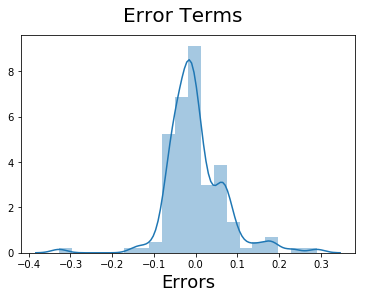

In [198]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seems to be approximately normally distributed.

### Testing Model

Scaling the numerical variable in the test dataset.

In [199]:
num_vars

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'highwaympg', 'citympg', 'boreratio', 'wheelbase', 'price'],
      dtype='object')

In [200]:
df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test.head()

,enginesize,curbweight,horsepower,carwidth,carlength,highwaympg,citympg,boreratio,wheelbase,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
126,0.484375,0.443264,0.656780,0.304762,0.382677,0.236842,0.111111,0.857143,0.084548,0.798685,...,0,0,0,0,1,0,0,0,0,1
122,0.109375,0.203145,0.067797,0.190476,0.357480,0.578947,0.500000,0.307143,0.206997,0.068818,...,0,0,0,1,0,0,0,0,0,0
22,0.078125,0.069273,0.067797,0.190476,0.200000,0.578947,0.500000,0.307143,0.206997,0.034782,...,0,0,0,1,0,0,0,0,0,0
11,0.148438,0.289843,0.207627,0.285714,0.507087,0.342105,0.277778,0.685714,0.425656,0.326187,...,0,0,0,1,0,0,0,0,0,1
154,0.085938,0.245219,0.042373,0.171429,0.395276,0.421053,0.388889,0.364286,0.265306,0.076802,...,0,0,0,1,0,0,0,0,0,0


In [201]:
df_test.columns

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'highwaympg', 'citympg', 'boreratio', 'wheelbase', 'price', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'turbo', 'fwd', 'rwd', 'gas', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Luxury'],
      dtype='object')

Dividing the test dataframe into X and y.

In [202]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

Use Model for predictions.

In [203]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [204]:
# Making predictions
y_pred = lm.predict(X_test_new)

Calculate R Squared value on the test dataset.

In [205]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8606584804658945

We have a R Squared of 0.86 for the test and 0.90 for the train which means the model is good and is not overfitted the data.

Text(0, 0.5, 'y_pred')

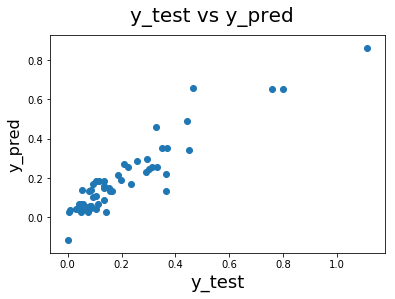

In [206]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [207]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.38e-70
Time:                        23:35:38   Log-Likelihood:                 175.69
No. Observations:                 142   AIC:                            -343.4
Df Residuals:                     138   BIC:                            -331.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0545      0.014     -3.821      0.0

### Model Interpretation

- Model has an R Squared of 0.902 and Adjusted R Squared of 0.904 which means that our model is able to explain 90% of the variance in the data.
- Model has F-statistic 0f 434.6 and prob(F-statistic) is almost equal to zero which suggests that the overall model fit is significant.
- P-value for all the variables is less than 0.05 significance level which means that all the variables used for the modelling are statistically significant.
- There is no such significant decrease in R Squared between train and test datasets which means the model is not overfitted and thus is generalized for the unseen data as well.
- The three significant variables for predicting the price of cars are horsepower, carwidth and luxury.
- Horsepower is the measure of the power of the engine. Our Model suggests it has positive correlation with the price with the coefficient as 0.41 which means a single unit increase in horsepower will increase the car cost by factor of 0.41.
- carwidth is the second most important significant variable which indicates the width of the car. Above model suggests that carwidth is positively correlated with the car price with a coefficient of 0.37.
- Luxury is derived metric based on the average prices of the car companies. Luxury refers to those car brands which have a average price more than 20000. In our model, this variable came out to be significant with a positive coefficient of 0.31 which means that if car is from brand having avg price greater than 20000 then the price will increase by factor of 0.31.